In [23]:
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets


In [25]:
df = pd.concat([X,y], axis=1)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


Rozmiar danych: (303, 14)
Jest to mały rozmiar danych, na którym byłoby trudno wytrenować skuteczny model.

In [26]:
numerical_columns = ['trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

In [27]:
df[numerical_columns].describe()

,trestbps,chol,thalach,oldpeak,ca
count,303.000000,303.000000,303.000000,303.000000,299.000000
mean,131.689769,246.693069,149.607261,1.039604,0.672241
std,17.599748,51.776918,22.875003,1.161075,0.937438
min,94.000000,126.000000,71.000000,0.000000,0.000000
25%,120.000000,211.000000,133.500000,0.000000,0.000000
50%,130.000000,241.000000,153.000000,0.800000,0.000000
75%,140.000000,275.000000,166.000000,1.600000,1.000000
max,200.000000,564.000000,202.000000,6.200000,3.000000


2. Jakie są średnie i odchylenia cech liczbowych?

Opisując kolumny o charakterze liczbowym warto zwrócić uwagę na miarę "std" czyli odchylenie standardowe. W przypadku parametrów trestbps, thalach, oldpeak i ca jest ono niewielkie. W przypadku chol jest ono nieco większe.

Jeśli chodzi o średnią, wartości znajduje się "pomiędzy" wartościami maksymalnymi oraz minimalnymi w przypadku atrybutów tj. trestbps, chol i thalach. W oldpeak i ca nie występuje taka zależność.

In [28]:
df.groupby('num').size()

num
0    164
1     55
2     36
3     35
4     13
dtype: int64

<Axes: xlabel='num', ylabel='count'>

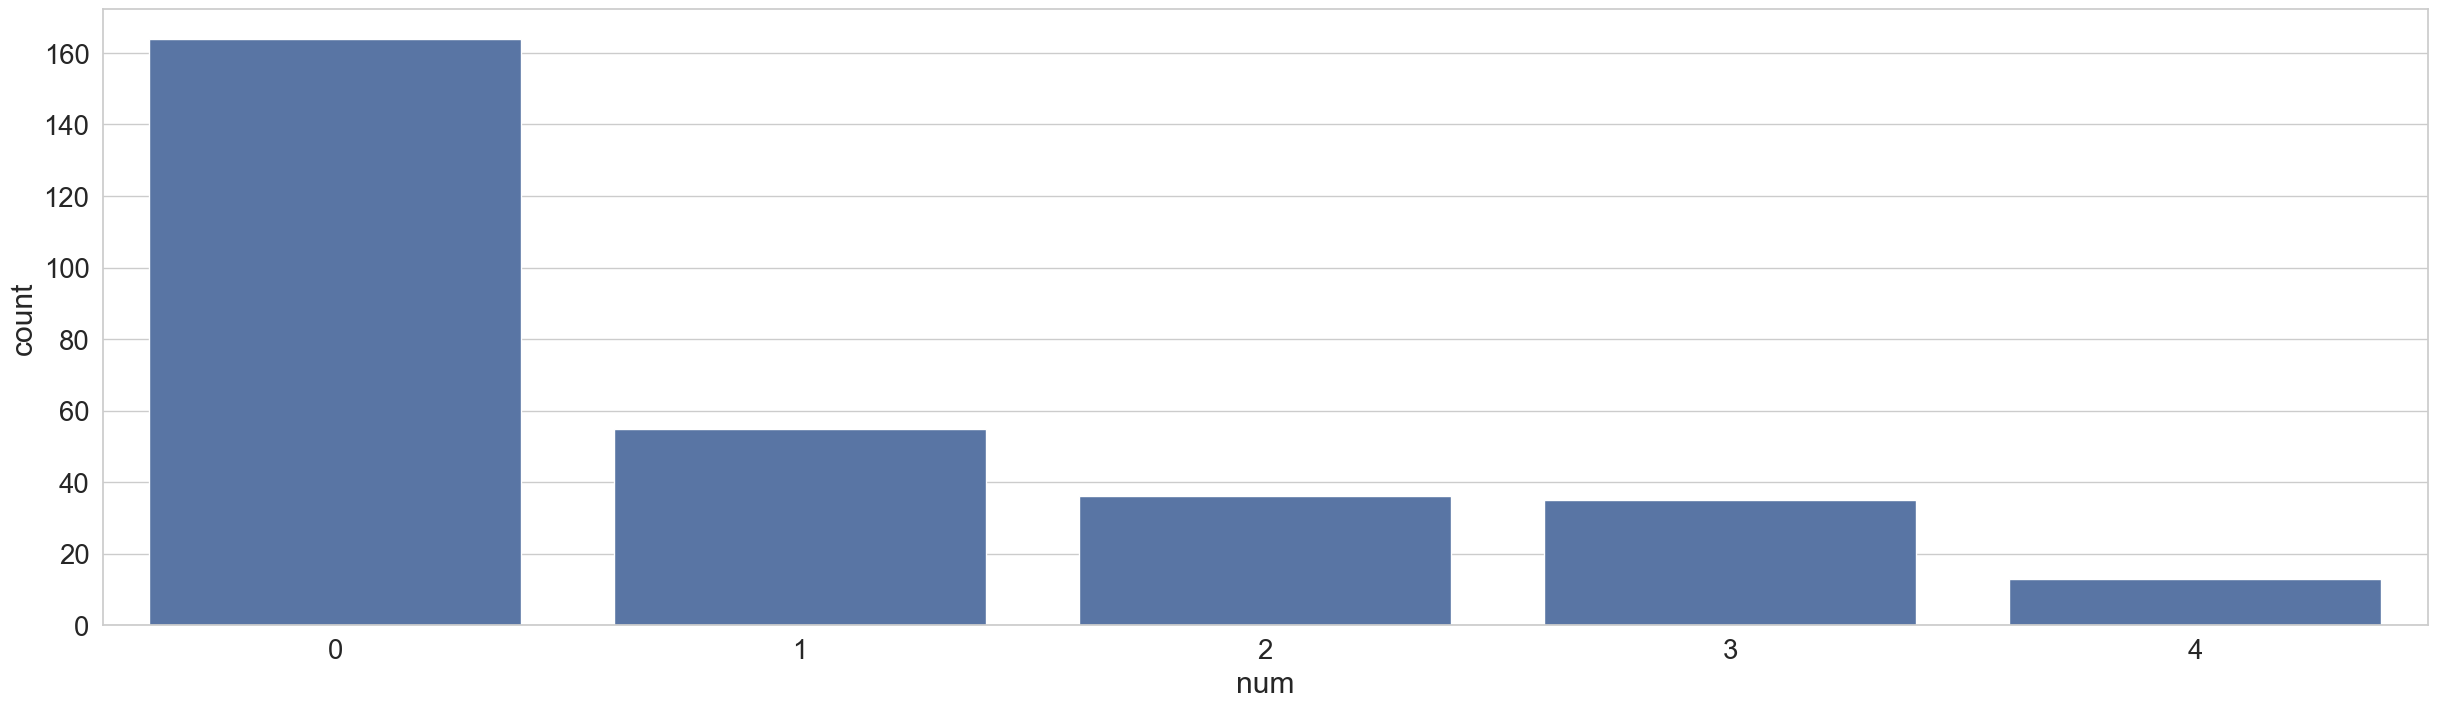

In [29]:
sns.set(style='whitegrid', font_scale=1.8)
plt.subplots(figsize=(30,8))
sns.countplot(x='num', data=df)

In [30]:
df.groupby(df['num'] >= 1.0 ).size()

num
False    164
True     139
dtype: int64

1. Czy zbiór jest zbalansowany względem liczby próbek na klasy?

Zbiór nie jest zbalansowany względem liczby próbek na klasy. Jeśli by rozpatrzać pytanie w kategorii czy zbiór jest zbalansowany względem podziału na zdrowych/chorych, wtedy stosunek wynosi 164 zdrowych i 139 chorych. Relacja jest więc podobna.

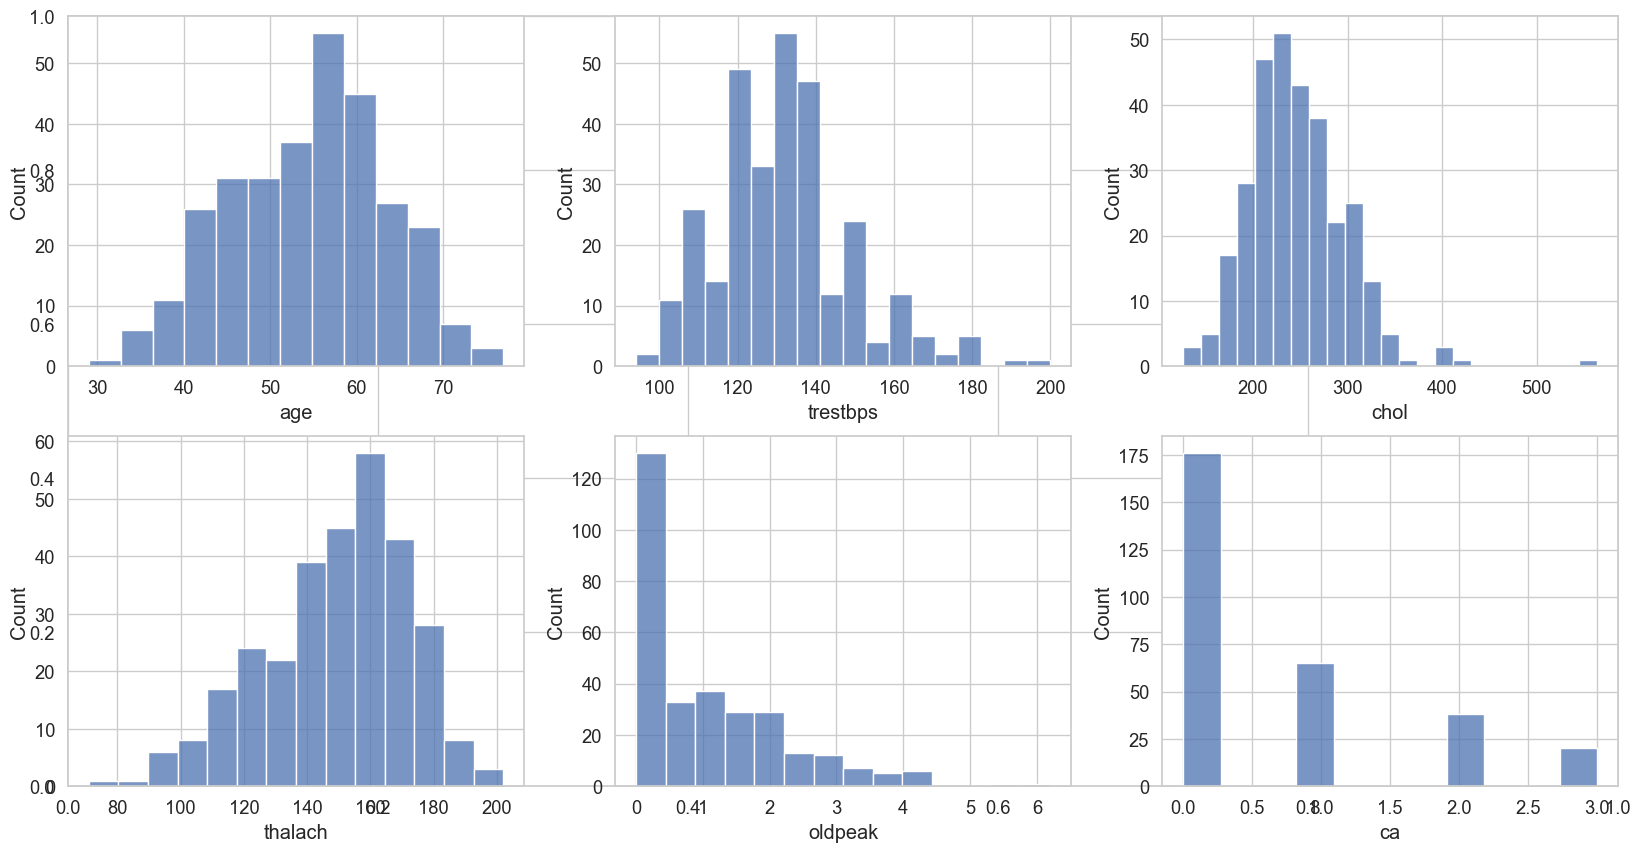

In [31]:
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (20,10))
plt.subplot(2,3,1)
sns.histplot(df.age)
plt.subplot(2,3,2)
sns.histplot(df.trestbps)
plt.subplot(2,3,3)
sns.histplot(df.chol)
plt.subplot(2,3,4)
sns.histplot(df.thalach)
plt.subplot(2,3,5)
sns.histplot(df.oldpeak)
plt.subplot(2,3,6)
sns.histplot(df.ca)
plt.show()

3. Dla cech liczbowych: czy ich rozkład jest w przybliżeniu normalny?

W przypadku histogramu dla cech liczbowych tak jak w przypadku analizy średniej wartości - tu również wartości dla atrybutów age, trestbps, chol i thalach przypominają rozkład normalny. Jeśli chodzi o oldpeak i ca, wartości nie przypominają rozkładu normalnego.

In [32]:
category_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

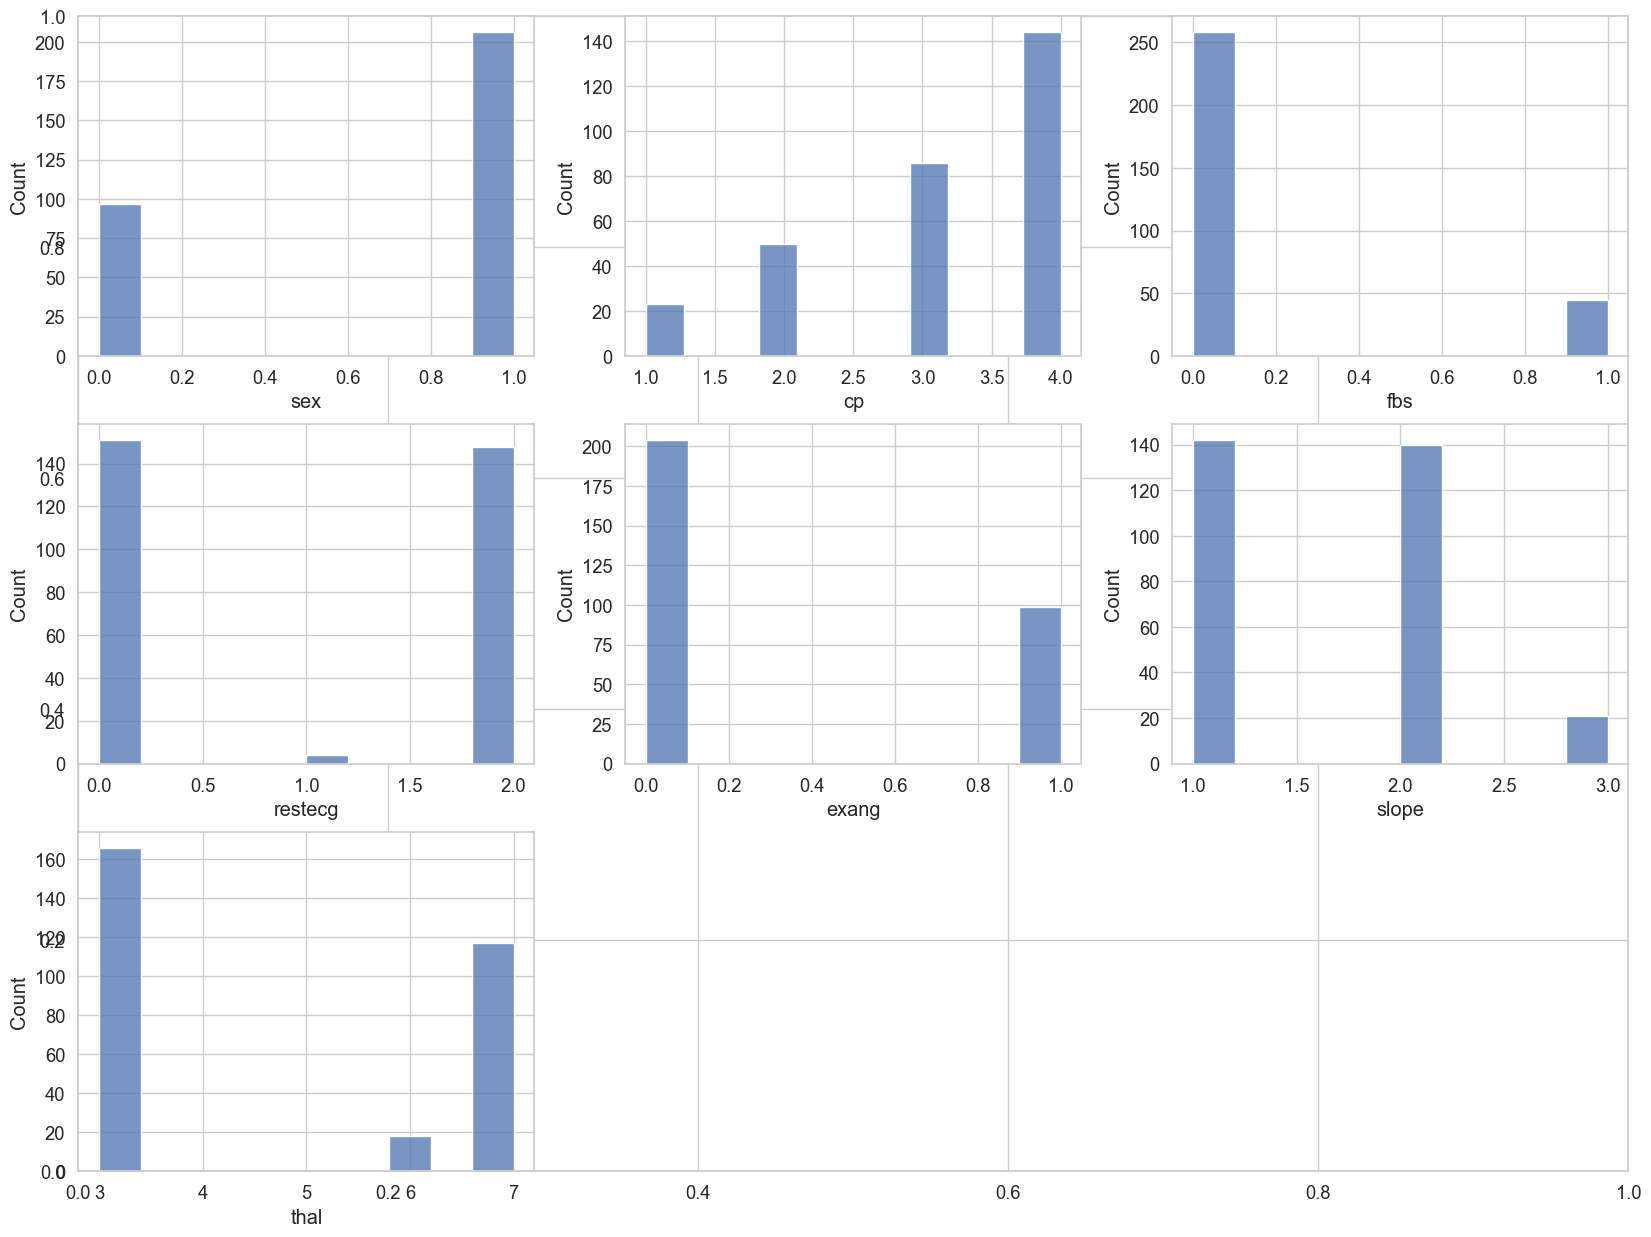

In [33]:
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (20,15))
plt.subplot(3,3,1)
sns.histplot(df.sex)
plt.subplot(3,3,2)
sns.histplot(df.cp)
plt.subplot(3,3,3)
sns.histplot(df.fbs)
plt.subplot(3,3,4)
sns.histplot(df.restecg)
plt.subplot(3,3,5)
sns.histplot(df.exang)
plt.subplot(3,3,6)
sns.histplot(df.slope)
plt.subplot(3,3,7)
sns.histplot(df.thal)
plt.show()

4. Dla cech kategorycznych: czy rozkład jest w przybliżeniu równomierny?

Trudno jednoznacznie stwierdzić czy rozkład dla cech kategorycznych jest w przybliżeniu równomierny, ponieważ dla niektórych cech (na przykład dla "restecg") jest, dla "slope", "exang" jest nieco mniej równomierny, a dla pozostałych cech nie jest równomierny.

In [34]:
df[df.isna().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,NaN,0
166,52,1,3,138,223,0,0,169,0,0.0,1,NaN,3.0,0
192,43,1,4,132,247,1,2,143,1,0.1,2,NaN,7.0,1
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,NaN,2
287,58,1,2,125,220,0,0,144,0,0.4,2,NaN,7.0,0
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


5. Czy występują cechy brakujące i jaką strategię możemy zastosować żeby je zastąpić?

Tak, występują cechy brakujące w sześciu rzędach. Brakuje 4 cech "ca" i dwóch cech "thal".
Żeby zastąpić brakujące wartości możemy ustawić w tych miejscach wartości średnie, bądź medianę dla danej kolumny.
Dla danych kategorycznych najlepiej sprawdzi się mediana, gdzie zakres wartości jest ograniczony.

Dlatego dla "ca" oraz "thal" użyjemy mediany.

In [35]:
df['ca'].fillna(df['ca'].mode()[0], inplace=True)
df['thal'].fillna(df['thal'].mode()[0], inplace=True)

In [36]:
def oneHotEncode(df, columnName, columnNames):
    df_dummies = pd.get_dummies(df[columnName], sparse=True, dtype=int)
    column_names = [columnName + '_' + str(name) for name in columnNames]
    df_dummies.columns = column_names
    # df_dummies = df_dummies.rename(columns={0.0: '0.0_'+columnName, 1.0: '1.0_'+columnName,2.0: '2.0_'+columnName,3.0: '3.0_'+columnName, })
    df = df.drop(columnName, axis=1)
    return pd.concat([df, df_dummies], axis=1)

In [37]:
df = oneHotEncode(df, 'cp', [0, 1, 2, 3])
df = oneHotEncode(df, 'sex', [0, 1])
df = oneHotEncode(df, 'thal', [0, 1, 2])
df = oneHotEncode(df, 'restecg', [0, 1, 2])

In [38]:
df

,age,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,num,...,cp_2,cp_3,sex_0,sex_1,thal_0,thal_1,thal_2,restecg_0,restecg_1,restecg_2
0,63,145,233,1,150,0,2.3,3,0.0,0,...,0,0,0,1,0,1,0,0,0,1
1,67,160,286,0,108,1,1.5,2,3.0,2,...,0,1,0,1,1,0,0,0,0,1
2,67,120,229,0,129,1,2.6,2,2.0,1,...,0,1,0,1,0,0,1,0,0,1
3,37,130,250,0,187,0,3.5,3,0.0,0,...,1,0,0,1,1,0,0,1,0,0
4,41,130,204,0,172,0,1.4,1,0.0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,110,264,0,132,0,1.2,2,0.0,1,...,0,0,0,1,0,0,1,1,0,0
299,68,144,193,1,141,0,3.4,2,2.0,2,...,0,1,0,1,0,0,1,1,0,0
300,57,130,131,0,115,1,1.2,2,1.0,3,...,0,1,0,1,0,0,1,1,0,0
301,57,130,236,0,174,0,0.0,2,1.0,1,...,0,0,1,0,1,0,0,0,0,1


__ZAD 2__

rozdzielenie zbioru na zbiór X oraz y

In [39]:
y = df['num']
X = df.drop('num', axis=1)

zmieniamy wartości stopnia choroby na fakt samej choroby, wartości >=1 oznaczają chorego

In [40]:
y = y.replace([1, 2, 3, 4], 1)
y.value_counts()
X

,age,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,cp_0,...,cp_2,cp_3,sex_0,sex_1,thal_0,thal_1,thal_2,restecg_0,restecg_1,restecg_2
0,63,145,233,1,150,0,2.3,3,0.0,1,...,0,0,0,1,0,1,0,0,0,1
1,67,160,286,0,108,1,1.5,2,3.0,0,...,0,1,0,1,1,0,0,0,0,1
2,67,120,229,0,129,1,2.6,2,2.0,0,...,0,1,0,1,0,0,1,0,0,1
3,37,130,250,0,187,0,3.5,3,0.0,0,...,1,0,0,1,1,0,0,1,0,0
4,41,130,204,0,172,0,1.4,1,0.0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,110,264,0,132,0,1.2,2,0.0,1,...,0,0,0,1,0,0,1,1,0,0
299,68,144,193,1,141,0,3.4,2,2.0,0,...,0,1,0,1,0,0,1,1,0,0
300,57,130,131,0,115,1,1.2,2,1.0,0,...,0,1,0,1,0,0,1,1,0,0
301,57,130,236,0,174,0,0.0,2,1.0,0,...,0,0,1,0,1,0,0,0,0,1


normalizator używany do normalizacji danych X_train i X_test

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

def normalize_data(X_train, X_test):
    scaler = StandardScaler()

    X_train_normalized = scaler.fit_transform(X_train)
    X_test_normalized = scaler.transform(X_test)

    return X_train_normalized, X_test_normalized



klasa modelu klasyfikatora, zawiera metody tj. p(self, x) - funkcja wyjścia, sigmoid(self, n) - funkcja sigmoid funkcja zawężająca zbiór wartości do < -1, 1 >, cost_function(self, y_pred, y) - funkcja kosztu używająca entropię krzyżową, predict(self, X_test) - funkcja zwracająca "0" dla osoby dla której wartość neuronu wyjściowego osiągnie <= 0.5, a "1" w przypadku przeciwnym, oraz fit(self, X_train, y_train), która we wskazanej liczbie epok iteruje i dopasowuje wagi - funkcja odpowiedzialna za naukę naszego modelu

In [42]:
class ClassificationModel:
    def __init__(self, size, epochs=1000, learning_rate=0.03):
        self.weights = np.random.rand(size, 1)
        self.bias = np.random.rand(1)
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.cost_list = []

    def p(self, x):
        argument = np.dot(x, self.weights) + self.bias
        return self.sigmoid(argument)

    def sigmoid(self, n):
        return 1/(1 + np.exp(-n))

    def predict(self, X_test):
        return [0 if x <= 0.5 else 1 for x in self.p(X_test)]

    def cost_function(self, y_pred, y):
        return (-(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))).mean()

    def fit(self, X_train, y_train):
        y_train = y_train.to_numpy().reshape(-1,1)
        timesDivide = self.epochs / 10
        np.random.seed(42)
        for i in range(self.epochs):

            permutation = np.random.permutation(X_train.shape[1])

            X_train_shuffled = X_train[permutation]
            y_train_shuffled = y_train[permutation]

            y_pred = self.p(X_train_shuffled)
            dz = y_pred - y_train_shuffled

            dw = 1/len(y_train_shuffled) * np.dot(np.transpose(X_train_shuffled), dz)
            db = 1/len(y_train_shuffled) * np.sum(dz)

            self.weights = self.weights - self.learning_rate * dw
            self.bias = self.bias - self.learning_rate * db

            cost = self.cost_function(self.p(X_train), y_train)
            prevCost = 0
            if i > 0 :
                prevCost = self.cost_list[-1]

            self.cost_list.append(cost)

            #if we want to apply epsilon to reduce overfitting
            # if i > 0 and abs(cost - prevCost) < 0.0001:
            #     print(f"Cost function of {i-1} iteration: {prevCost}")
            #     print(f"Cost function of {i} iteration: {cost}")
            #     break

            if i % timesDivide == 0:
                print(f"Cost function of {i} iteration: {cost}")


Podział danych na zbiory testowe i do trenowania

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test = normalize_data(X_train=X_train, X_test=X_test)
model = ClassificationModel(size=X_train.shape[1], learning_rate=0.005)
model.fit(X_train, y_train)

Cost function of 0 iteration: 0.8375142724164037
Cost function of 100 iteration: 0.7445236076235351
Cost function of 200 iteration: 0.6910247339493955
Cost function of 300 iteration: 0.6604097563068372
Cost function of 400 iteration: 0.6422345405374829
Cost function of 500 iteration: 0.6310166858118949
Cost function of 600 iteration: 0.623946963702617
Cost function of 700 iteration: 0.6195169790415314
Cost function of 800 iteration: 0.6168617923341074
Cost function of 900 iteration: 0.6154537431429


C:\Users\march\OneDrive - Politechnika Wroclawska\Semestr 7\Sieci neuronowe\lab1_1\venv\lib\site-packages\sklearn\utils\validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\march\OneDrive - Politechnika Wroclawska\Semestr 7\Sieci neuronowe\lab1_1\venv\lib\site-packages\sklearn\utils\validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\march\OneDrive - Politechnika Wroclawska\Semestr 7\Sieci neuronowe\lab1_1\venv\lib\site-packages\sklearn\utils\validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Wyświetlenie metryk określających jakość nauczonego modelu na danych testowych

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

y_pred = model.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1: ", f1_score(y_test, y_pred))

Accuracy:  0.7213114754098361
Precision:  0.7586206896551724
Recall:  0.6875
F1:  0.7213114754098361


Wyświetlenie procesu nauki (funkcji kosztu) w czasie (od liczby epok) na wykresie liniowym

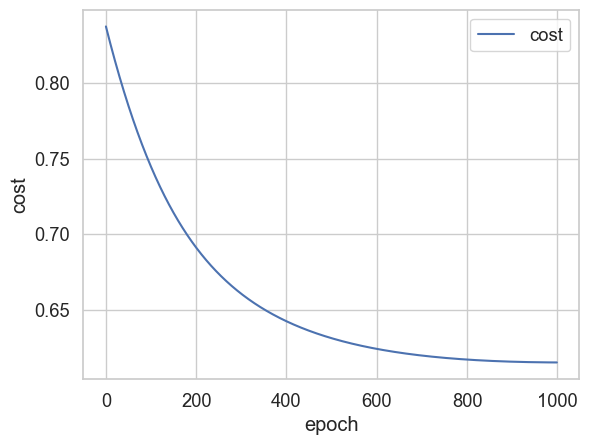

In [45]:
plt.plot(model.cost_list, label='cost')
# plt.plot(model.mean_cost_list, label='mean cost' )
plt.legend(loc = 'best')
plt.xlabel("epoch")
plt.ylabel("cost")
plt.show()

__ZAD 3__

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_test = normalize_data(X_train=X_train, X_test=X_test)

class ClassificationModelWithHiddenLayers:
    def __init__(self, layersTable, epochs=1000, learning_rate=0.03):
        self.weights = self.fillWeights(layersTable)
        self.biases = self.fillBiases(layersTable)
        self.bias = np.random.rand(1)
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.cost_list = []
        self.sums_weights = []

    def fillWeights(self, layersTable):
        weights = []
        for i in range(1, len(layersTable)):
            input_size = layersTable[i - 1]
            output_size = layersTable[i]
            weight_matrix = np.random.randn(input_size, output_size) 
            weights.append(weight_matrix)
        return weights

    def fillBiases(self, layersTable):
        biases = []
        for i in range(1, len(layersTable)):
            # input_size = layersTable[i - 1]
            output_size = layersTable[i]
            bias_vector = np.zeros((1, output_size))
            biases.append(bias_vector)
        return biases
            
    # def p(self, x):
    #     z = np.dot(x, self.weights) + self.bias
    #     a = self.sigmoid(z)
    #     return a

    def sigmoid(self, n):
        return 1/(1 + np.exp(-n))

    def predict(self, X_test):
        return [0 if x <= 0.5 else 1 for x in self.p(X_test)]

    def cost_function(self, y_pred, y):
        return (-(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)))
    
    def derivative_sigmoid(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))
    
    def forward(self, X):
        attribute_vector = X
        for i in range(0, len(self.weights)):
            z = np.dot(attribute_vector, self.weights[i]) + self.biases[i]
            self.sums_weights.append(z)
            a = self.sigmoid(z)
            attribute_vector = a
        #zwracamy wektor wartości funkcji aktywacji na warstwie wyjściowej
        return attribute_vector

    #cost - wektor (303x1), blad - z 303x10 -> wektor 303x1 raczej
    def backward(self, y_pred, last_layer_cost_vector):
        costs = [last_layer_cost_vector]
        recent_cost = last_layer_cost_vector
        for i in range(len(self.weights) - 1, 0, -1):
            hidden_layer_cost_vector = self.derivative_sigmoid(self.sums_weights[i-1]) * (np.dot(recent_cost, self.weights[i].T))
            costs.insert(0, hidden_layer_cost_vector)
            recent_cost = hidden_layer_cost_vector
        return costs

    #     
    # def upgrade_weights(self):
        
    def fit(self, X_train, y_train):
        #convert (242,) to (242,1)
        y_train = y_train.to_numpy().reshape(-1,1)
        timesDivide = self.epochs / 10
        for i in range(self.epochs):
            
            y_pred = self.forward(X_train)
            cost = self.cost_function(y_pred, y_train)
            self.cost_list.append(cost.mean())
            costs = self.backward(y_pred, cost)
            
            for j in reversed(range(len(costs))):
                if j == 0:
                    dw = 1 / len(y_train) * np.dot(X_train.T, costs[j])
                else:
                    dw = 1 / len(y_train) * np.dot(self.sums_weights[j-1].T, costs[j])
                db = 1 / len(y_train) * np.sum(costs[j], axis=0)
                self.weights[j] -= self.learning_rate * dw
                self.biases[j] -= self.learning_rate * db
            
            
            
            
            print(f"Cost function of {i} iteration: {cost.mean()}")
            #     break



figure, axis = plt.subplots(1, 2) 
for i in range(2):
    model = ClassificationModelWithHiddenLayers(layersTable=[21, 10, 1], epochs=500, learning_rate=0.001)
    model.fit(X_train, y_train)
    if model.cost_list[0] > model.cost_list[-1]: #max(model.cost_list) < 1.99:
        axis[0].plot(model.cost_list, label='cost')
        # plt.plot(model.mean_cost_list, label='mean cost' )
        axis[0].legend(loc = 'best')
        # axis[0].xlabel("epoch")
        # axis[0].ylabel("cost")
        # plt.show()
    else :
        pass
        axis[1].plot(model.cost_list, label='cost')
        # plt.plot(model.mean_cost_list, label='mean cost' )
        axis[1].legend(loc = 'best')
        # axis[1].xlabel("epoch")
        # axis[1].ylabel("cost")
        # plt.show()
        
    # plt.savefig(f'cost_history_{i}.png')
plt.show()

# Zapisz wykres na dysku
# model.forward(X)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test = normalize_data(X_train=X_train, X_test=X_test)

class ClassificationModelWithHiddenLayers:
    def __init__(self, layersTable, epochs=1000, learning_rate=0.03):
        self.weights = self.fillWeights(layersTable)
        self.biases = self.fillBiases(layersTable)
        self.bias = np.random.rand(1)
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.cost_list = []
        self.sums_weights = []

    def fillWeights(self, layersTable):
        weights = []
        for i in range(1, len(layersTable)):
            input_size = layersTable[i - 1]
            output_size = layersTable[i]
            weight_matrix = np.random.randn(input_size, output_size) 
            weights.append(weight_matrix)
        return weights

    def fillBiases(self, layersTable):
        biases = []
        for i in range(1, len(layersTable)):
            # input_size = layersTable[i - 1]
            output_size = layersTable[i]
            bias_vector = np.zeros((1, output_size))
            biases.append(bias_vector)
        return biases

    def sigmoid(self, n):
        return 1/(1 + np.exp(-n))

    def predict(self, X_test):
        self.forward(X_test)
        y_pred = np.squeeze(self.sums_weights[-1])  
        predictions = [1 if x > 0.5 else 0 for x in y_pred] 
        return predictions

    def cost_function(self, y_pred, y):
        return -np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    
    def derivative_sigmoid(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))
    
    def forward(self, X):
        self.sums_weights = [X]
        for i in range(0, len(self.weights)):
            z = np.dot(self.sums_weights[-1], self.weights[i]) + self.biases[i]
            a = self.sigmoid(z)
            self.sums_weights.append(a)
        
        #zwracamy wektor wartości funkcji aktywacji na warstwie wyjściowej
        return self.sums_weights

    #cost - wektor (303x1), blad - z 303x10 -> wektor 303x1 raczej
    def backward(self, y_train):
        y_pred = np.squeeze(self.sums_weights[-1])
        delta = y_train - y_pred
        delta = np.reshape(delta, (len(delta),1 ))
        # delta (242,1)
        deltas = [delta]
        for i in range(len(self.weights) - 1, 0, -1):
            delta_error = self.derivative_sigmoid(self.sums_weights[i]) * (np.dot(deltas[0], self.weights[i].T))
            deltas.insert(0, delta_error)
            
        return deltas

        
    def fit(self, X_train, y_train, batch_size=22):
        y_train = y_train.values

    
        for i in range(self.epochs):
            cost_sum = 0.0
            for j in range(0, len(X_train), batch_size):
                X_batch = X_train[j:j + batch_size]
                y_batch = y_train[j:j + batch_size]
    
                self.forward(X_batch)
                y_pred = np.squeeze(self.sums_weights[-1])
                cost = self.cost_function(y_pred, y_batch)
                # self.cost_list.append(cost.mean())
                deltas = self.backward(y_batch)
    
                for k in reversed(range(len(deltas))):
                    if k == 0:
                        dw = np.dot(X_batch.T, deltas[k])
                    else:
                        dw = np.dot(self.sums_weights[k].T, deltas[k])
                    db = np.sum(deltas[k], axis=0)
                    self.weights[k] += self.learning_rate * dw
                    self.biases[k] += self.learning_rate * db
    
                cost_sum += cost.mean()
    
            average_cost = cost_sum / (len(X_train) / batch_size)
            self.cost_list.append(average_cost)
            # print(f"Cost function of {i} iteration: {average_cost}")



C:\Users\march\OneDrive - Politechnika Wroclawska\Semestr 7\Sieci neuronowe\lab1_1\venv\lib\site-packages\sklearn\utils\validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\march\OneDrive - Politechnika Wroclawska\Semestr 7\Sieci neuronowe\lab1_1\venv\lib\site-packages\sklearn\utils\validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\march\OneDrive - Politechnika Wroclawska\Semestr 7\Sieci neuronowe\lab1_1\venv\lib\site-packages\sklearn\utils\validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [75]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from matplotlib.pyplot import figure

# figure, axis = plt.subplots(3, 2, figsize=(12, 12))
def testModel(layersTable = [21, 10, 1], epochs = 500, learning_rate = 0.001):
    model = ClassificationModelWithHiddenLayers(layersTable=layersTable, epochs=epochs, learning_rate=learning_rate)
    model.fit(X_train, y_train)
    title = f"shape: {layersTable}, epochs: {epochs}, learning rate: {learning_rate})"
    plt.plot(model.cost_list, label=title)
    plt.legend(loc='upper right')
    plt.xlabel("epoch")
    plt.ylabel("cost")
    # plt.title(f"shape: {layersTable}, epochs: {epochs}, learning rate: {learning_rate})")
    y_pred = model.predict(X_test)
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Precision: ", precision_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))
    print("F1: ", f1_score(y_test, y_pred))


Accuracy:  0.8852459016393442
Precision:  0.8787878787878788
Recall:  0.90625
F1:  0.8923076923076922
Accuracy:  0.8524590163934426
Precision:  0.8484848484848485
Recall:  0.875
F1:  0.8615384615384615
Accuracy:  0.8360655737704918
Precision:  0.84375
Recall:  0.84375
F1:  0.84375
Accuracy:  0.47540983606557374
Precision:  0.0
Recall:  0.0
F1:  0.0


C:\Users\march\OneDrive - Politechnika Wroclawska\Semestr 7\Sieci neuronowe\lab1_1\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


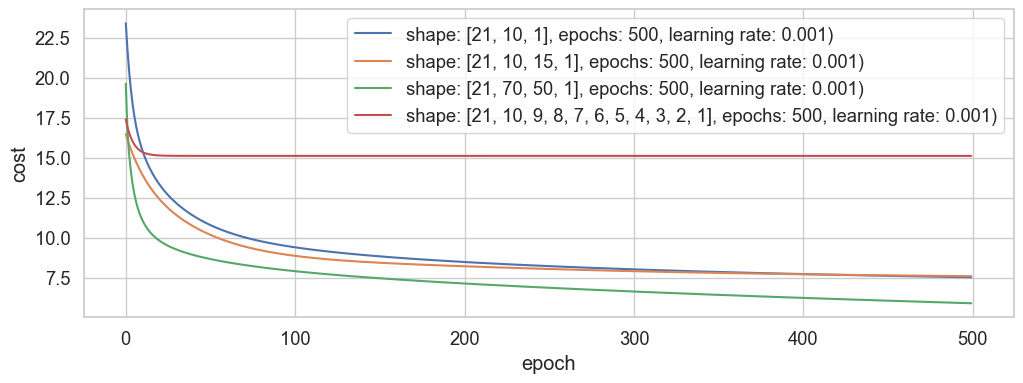

Accuracy:  0.8852459016393442
Precision:  0.8787878787878788
Recall:  0.90625
F1:  0.8923076923076922


C:\Users\march\AppData\Local\Temp\ipykernel_14080\3351743772.py:42: RuntimeWarning: divide by zero encountered in log
  return -np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
C:\Users\march\AppData\Local\Temp\ipykernel_14080\3351743772.py:42: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))


Accuracy:  0.8360655737704918
Precision:  0.8666666666666667
Recall:  0.8125
F1:  0.8387096774193549


C:\Users\march\AppData\Local\Temp\ipykernel_14080\3351743772.py:42: RuntimeWarning: divide by zero encountered in log
  return -np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
C:\Users\march\AppData\Local\Temp\ipykernel_14080\3351743772.py:42: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
C:\Users\march\AppData\Local\Temp\ipykernel_14080\3351743772.py:33: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-n))


Accuracy:  0.8852459016393442
Precision:  0.9032258064516129
Recall:  0.875
F1:  0.8888888888888888


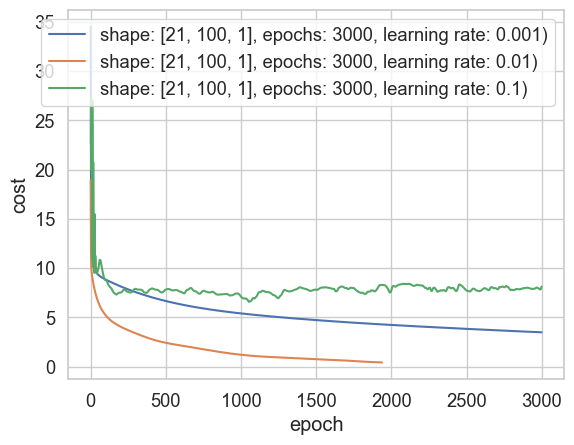

In [83]:
figure(figsize=(12,4))
testModel(layersTable=[21,10,1], epochs=500, learning_rate=0.001)
testModel(layersTable=[21, 10, 15, 1], epochs=500, learning_rate=0.001)
testModel(layersTable=[21, 70, 50,1], epochs=500, learning_rate=0.001)
testModel(layersTable=[21, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1], epochs=500, learning_rate=0.001)
plt.show()
testModel(layersTable=[21, 100, 1], epochs=3000, learning_rate=0.001)
testModel(layersTable=[21, 100, 1], epochs=3000, learning_rate=0.01)
testModel(layersTable=[21, 100, 1], epochs=3000, learning_rate=0.1)
plt.show()


__a)__ W pierwszym przypadku przetestowaliśmy różne kombinacje ilości warstw ukrytych oraz wartości neuronów w warstwach ukrytych (dla learning_rate = 0.001 oraz 500 epok. Widzimy, że:
- największe accuracy osiągnął layersTable=[21,10,1] równe w przybliżeniu 0.885
- najmniejszy koszt po 500 epokach osiągnał layersTable=[21, 70, 50,1]
- najgorszy rezultat osiągnął layersTable=[21, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1], który był puszczony eksperymentalnie. Jego wynik accuracy to 0.475

__b)__ W drugim przypadku porównywaliśmy learning rate na trzech przypadkach z liczbą iteracji równą 3000 epok.
Obserwowaliśmy naukę w dwóch przypadkach, dla learning_rate = 0.001 oraz 0.01. Dla learning_rate = 0.1 skok był zbyt duży powodując przeskakiwanie nad minimum lokalnym, co jes zauważalne na wykresie (zielony kolor).